In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import matplotlib.cm as cm
import seaborn as sns

In [52]:
year = 1956

In [53]:
df = pd.read_csv("../processed data/" + str(year) + "/uitslagen" + str(year) + ".csv")

In [54]:
df

,Datum,Thuis,Uit,Thuis Doelpunten,Uit Doelpunten,Uitslag
0,02-09-1956,DOS,Sparta Rotterdam,2,3,Verloren
1,02-09-1956,Fortuna '54,FC Eindhoven,4,1,Gewonnen
2,02-09-1956,VVV-Venlo,GVAV,1,0,Gewonnen
3,02-09-1956,Ajax,NAC Breda,1,0,Gewonnen
4,02-09-1956,PSV,MVV Maastricht,1,3,Verloren
...,...,...,...,...,...,...
301,02-06-1957,PSV,FC Eindhoven,7,4,Gewonnen
302,02-06-1957,VVV-Venlo,Sparta Rotterdam,2,1,Gewonnen
303,02-06-1957,SC Enschede,MVV Maastricht,7,2,Gewonnen
304,02-06-1957,Feyenoord,BVC Amsterdam,2,2,Gelijk


In [55]:
begin = 1956
end = 2024
seasons = end - begin

progression = pd.DataFrame([], columns=["Club", "Jaar", "Gs", "W", "G", "V", "Pnt", "Dv", "Dt", "Ds"])

lengte = 0
eerste = []
punten = []
for year in range(begin, end):
    df = pd.read_csv("../processed data/" + str(year) + "/uitslagen" + str(year) + ".csv")
    df2 = pd.read_csv("../processed data/" + str(year) + "/eindstand_modern" + str(year) + ".csv")
    teams = list(df2["Club"])
    eerste.append(lengte)
    lengte += len(teams)
    for team in teams:
        team_season = df[(df["Thuis"] == team) | (df["Uit"] == team)]
        rows = []

        w = 0
        g = 0
        v = 0
        p = 0
        dv = 0
        dt = 0 
        ds = 0
        rows.append([team, year, 0, w, g, v, p , dv, dt, ds])
        for i in range(len(team_season)):
            if team_season.iloc[i]["Thuis"] == team:
                w += 1 if team_season.iloc[i]["Uitslag"] == "Gewonnen" else 0
                g += 1 if team_season.iloc[i]["Uitslag"] == "Gelijk" else 0
                v += 1 if team_season.iloc[i]["Uitslag"] == "Verloren" else 0
                p = 3 * w + g
                dv += team_season.iloc[i]["Thuis Doelpunten"]
                dt += team_season.iloc[i]["Uit Doelpunten"]
                ds = dv - dt
            else:
                w += 1 if team_season.iloc[i]["Uitslag"] == "Verloren" else 0
                g += 1 if team_season.iloc[i]["Uitslag"] == "Gelijk" else 0
                v += 1 if team_season.iloc[i]["Uitslag"] == "Gewonnen" else 0
                p = 3 * w + g
                dv += team_season.iloc[i]["Uit Doelpunten"]
                dt += team_season.iloc[i]["Thuis Doelpunten"]
                ds = dv - dt
            
            rows.append([team, year, i + 1, w, g, v, p, dv, dt, ds])

        progression = pd.concat([progression, pd.DataFrame(rows, columns=["Club", "Jaar", "Gs", "W", "G", "V", "Pnt", "Dv", "Dt", "Ds"])])
        punten.append(list(progression["Pnt"]))




In [56]:
progression = progression.astype({
    "Club": "string",  # Text
    "Jaar": "int",     # Year as integer
    "Gs": "int",       # Integer
    "W": "int",        # Integer
    "G": "int",        # Integer
    "V": "int",        # Integer
    "Pnt": "int",      # Integer
    "Dv": "int",       # Integer
    "Dt": "int",       # Integer
    "Ds": "int"        # Integer
})

progression = progression.reset_index(drop=True)

In [57]:
progression

,Club,Jaar,Gs,W,G,V,Pnt,Dv,Dt,Ds
0,Ajax,1956,0,0,0,0,0,0,0,0
1,Ajax,1956,1,1,0,0,3,1,0,1
2,Ajax,1956,2,2,0,0,6,3,1,2
3,Ajax,1956,3,3,0,0,9,7,3,4
4,Ajax,1956,4,4,0,0,12,10,3,7
...,...,...,...,...,...,...,...,...,...,...
42151,FC Volendam,2023,30,4,7,19,19,30,74,-44
42152,FC Volendam,2023,31,4,7,20,19,30,75,-45
42153,FC Volendam,2023,32,4,7,21,19,31,79,-48
42154,FC Volendam,2023,33,4,7,22,19,33,86,-53


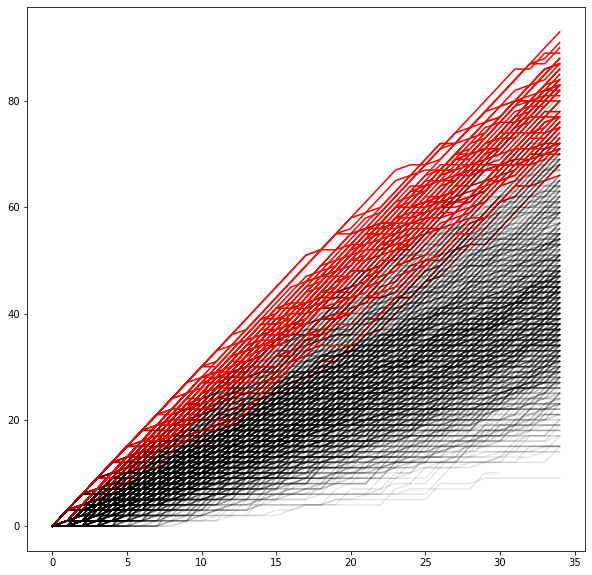

In [58]:
# Create a single figure and axis
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

for year in range(1956, 2024):
    clubs = list(progression[(progression["Jaar"] == year)]["Club"].unique())

    custom_colors = [
        (1, 0, 0, 1) if i == 0 else (0, 0, 0, 0.1)  # Assign red or light gray
        for i in range(len(clubs))
    ]

    # Plot each line with the custom colors
    for i, color in enumerate(custom_colors):
        x = progression[(progression["Jaar"] == year) & (progression["Club"] == clubs[i])]["Gs"]
        y = progression[(progression["Jaar"] == year) & (progression["Club"] == clubs[i])]["Pnt"]
        plt.plot(x, y, color=color)

# Optional: Add labels or titles if needed
plt.show()

In [59]:
# Generate the plasma colormap with `seasons` colors
colormap = cm.get_cmap("plasma", seasons)

In [60]:
# Find the row with the minimum value in the Pnt column
progression.loc[progression[progression["Gs"] == 34]["Ds"].idxmin()]

Club    Heracles Almelo
Jaar               1985
Gs                   34
W                     3
G                     6
V                    25
Pnt                  15
Dv                   26
Dt                   99
Ds                  -73
Name: 18363, dtype: object

In [61]:
progression[progression["Gs"] == 34]["W"].min()

1

In [62]:
progression[progression["Gs"] == 34][progression["W"] == 1]

/tmp/ipykernel_5081/1079225629.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  progression[progression["Gs"] == 34][progression["W"] == 1]


,Club,Jaar,Gs,W,G,V,Pnt,Dv,Dt,Ds
8913,HFC Haarlem,1970,34,1,12,21,15,22,64,-42
30963,RBC Roosendaal,2005,34,1,6,27,9,22,90,-68


In [63]:
progression[progression["Jaar"] == 1956]

,Club,Jaar,Gs,W,G,V,Pnt,Dv,Dt,Ds
0,Ajax,1956,0,0,0,0,0,0,0,0
1,Ajax,1956,1,1,0,0,3,1,0,1
2,Ajax,1956,2,2,0,0,6,3,1,2
3,Ajax,1956,3,3,0,0,9,7,3,4
4,Ajax,1956,4,4,0,0,12,10,3,7
...,...,...,...,...,...,...,...,...,...,...
625,FC Eindhoven,1956,30,6,4,20,22,27,70,-43
626,FC Eindhoven,1956,31,6,4,21,22,29,73,-44
627,FC Eindhoven,1956,32,7,4,21,25,32,74,-42
628,FC Eindhoven,1956,33,8,4,21,28,35,76,-41


In [64]:
eindstand = progression[(progression["Gs"] == 34) | ((progression["Gs"] == 30) & ((progression["Jaar"] >= 1962) & (progression["Jaar"] <= 1965)))]

/home/lars/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


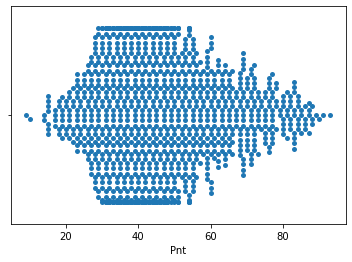

In [66]:
for jaar in range(1956, 2024):
    jaar_eindstand = eindstand[eindstand["Jaar"] == jaar]
    jaar_eindstand = jaar_eindstand.copy()  # Avoid SettingWithCopyWarning
    jaar_eindstand["Pos"] = list(range(1, len(jaar_eindstand) + 1))
    eindstand.loc[eindstand["Jaar"] == jaar, "Pos"] = jaar_eindstand["Pos"].values

/tmp/ipykernel_5081/814371959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eindstand.loc[eindstand["Jaar"] == jaar, "Pos"] = jaar_eindstand["Pos"].values


In [67]:
eindstand = eindstand.astype({
    "Club": "string",  # Text
    "Jaar": "int",     # Year as integer
    "Gs": "int",       # Integer
    "W": "int",        # Integer
    "G": "int",        # Integer
    "V": "int",        # Integer
    "Pnt": "int",      # Integer
    "Dv": "int",       # Integer
    "Dt": "int",       # Integer
    "Ds": "int",       # Integer
    "Pos": "int"       # Integer
})


In [68]:
eindstand

,Club,Jaar,Gs,W,G,V,Pnt,Dv,Dt,Ds,Pos
34,Ajax,1956,34,22,5,7,71,64,40,24,1
69,Fortuna '54,1956,34,20,5,9,65,76,48,28,2
104,PSV,1956,34,18,3,13,57,93,71,22,3
139,SC Enschede,1956,34,15,11,8,56,81,47,34,4
174,MVV Maastricht,1956,34,15,10,9,55,53,42,11,5
...,...,...,...,...,...,...,...,...,...,...,...
42015,Heracles Almelo,2023,34,9,6,19,33,41,74,-33,14
42050,RKC Waalwijk,2023,34,7,8,19,29,38,56,-18,15
42085,Excelsior Rotterdam,2023,34,6,11,17,29,50,73,-23,16
42120,Vitesse,2023,34,6,6,22,24,30,74,-44,17


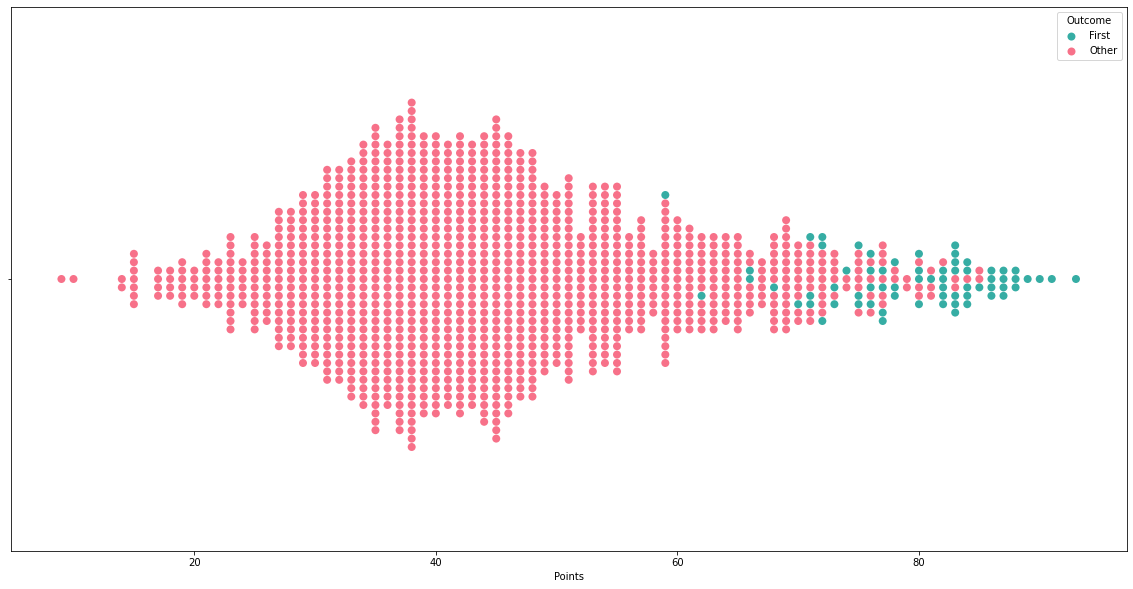

In [121]:
plt.figure(figsize=(20, 10))
sns.swarmplot(data=eindstand, x="Pnt", hue=(eindstand["Pos"] <= 1), palette=sns.color_palette("husl", 2), size=8, linewidth=0, orient="h", native_scale=True)

plt.legend(
    title="Outcome",
    labels=["First", "Other"],
    loc="best"
)

plt.xlabel("Points")

plt.show()

In [124]:
eindstand[(eindstand["Pos"] == 1) & (eindstand["Pnt"] >= 90)]

,Club,Jaar,Gs,W,G,V,Pnt,Dv,Dt,Ds,Pos
8948,Ajax,1971,34,30,3,1,93,104,20,84,1
9578,Ajax,1972,34,30,0,4,90,102,18,84,1
41560,PSV,2023,34,29,4,1,91,111,21,90,1
